<h1><b>인공지능개론 10주차 과제(MNIST DL)</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>0. 라이브러리 import(분류)</b></h2>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<h2><b>1. 하이퍼 파라미터</b></h2>

In [2]:
batch_size = 64
learning_rate = 0.001
epochs = 5

<h2><b>2. 데이터 전처리  로딩</b></h2>

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.24MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.38MB/s]


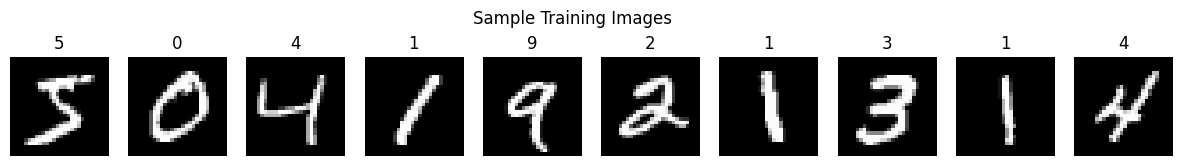

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()  # Keep as (1, 28, 28)
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(str(label))
    axes[i].axis('off')
plt.suptitle("Sample Training Images")
plt.show()

<h2><b>3. CNN 모델 정의</b></h2>

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

model = CNN()

<h2><b>4. 손실 함수와 옵티마이저</b></h2>

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

<h2><b>5. 학습 루프</b></h2>

In [6]:
epoch_losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.1803
Epoch 2, Loss: 0.0501
Epoch 3, Loss: 0.0350
Epoch 4, Loss: 0.0255
Epoch 5, Loss: 0.0192


<h2><b>6. 테스트 정확도 측정</b></h2>

In [7]:
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

<h2><b>7. 학습곡선 시각화</b></h2>

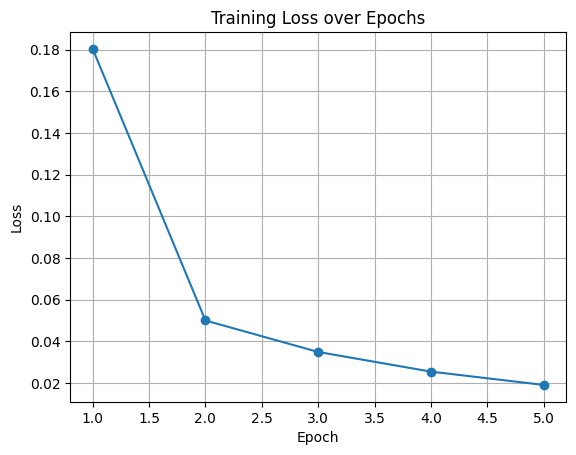

In [8]:
plt.plot(range(1, epochs + 1), epoch_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

<h2><b>8. 혼동 행렬 및 리포트</b></h2>

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.97      1.00      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



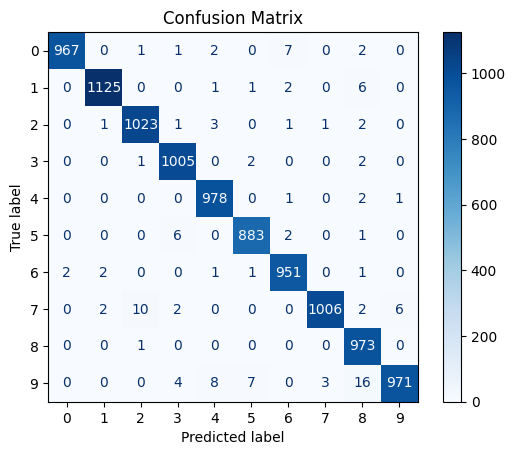

In [9]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


<h2><b>9. 예측 결과 시각화</b></h2>

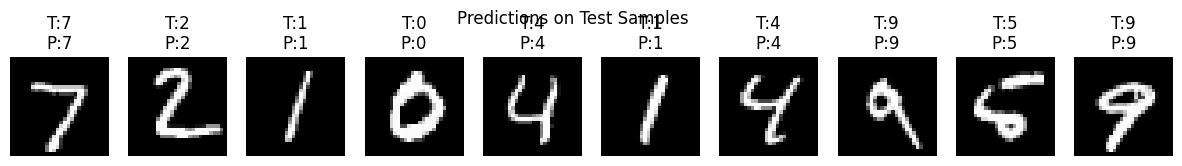

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    image, label = test_dataset[i]
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted = torch.argmax(output).item()
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"T:{label}\nP:{predicted}")
    axes[i].axis('off')
plt.suptitle("Predictions on Test Samples")
plt.show()
